In [93]:
from pvodataset import PVODataset, UDFClass, QCfunc
import pandas as pd

In [94]:
pvod = PVODataset(path="../datasets/",timezone="UTC+8")
meta_data = pvod.read_metadata()
meta_data

Welcome to PVODataset (PVOD).


,Station_ID,Capacity,PV_Technology,Panel_Size,Module,Inverters,Layout,Panel_Number,Array_Tilt,Pyranometer,Longitude,Latitude
0,station00,6600,Poly-Si,1.62360,products types:LW255(29)P1640×990\r\nPmax:255 ...,products types:NSG-500K3TL\r\nMax. DC input:56...,modules per string:20\r\nstrings per inverter:96,26000,South 33°,GHI: \r\nproducts types: TBQ-2\r\nmeasurement ...,114.951390,38.047780
1,station01,20000,Poly-Si,1.66350,products types:LW6P60-270\r\nPmax:270 Wp\r\nVm...,products types:TC500KH\r\nMax. DC input:618 kW...,modules per string:22\r\nstrings per inverter:128,74000,South 33°,GHI: \r\nproducts types: TBQ-2\r\nmeasurement ...,117.457220,38.183060
2,station02,17000,Mono-Si,1.63680,products types:RSM60-6-285M\r\nPmax:285 Wp\r\n...,products types:SG50KTL-M\r\nMax. DC input:-\r\...,modules per string:22\r\nstrings per inverter:8,64064,South 29°,GHI: \r\nproducts types: TBQ-2\r\nmeasurement ...,114.198870,38.057280
3,station03,20000,Poly-Si,1.62000,products types:HTMP265P4-60\r\nPmax:265 Wp\r\n...,products types:PVL-L1000E\r\nMax. DC input:-\r...,modules per string:22\r\nstrings per inverter:16,75460,South 33°,GHI: \r\nproducts types: TBQ-2L\r\nmeasurement...,114.114940,38.109560
4,station04,20000,Poly-Si,1.63680,products types:YL265P-29b\r\nPmax:265 Wp\r\nVm...,products types:SG1000\r\nMax. DC input:560 kW\...,modules per string:22\r\nstrings per inverter:86,75680,South 37°,GHI: \r\nproducts types: TBQ-2\r\nmeasurement ...,114.867670,39.515500
5,station05,35000,Poly-Si,1.63515,products types:LR6-60-305M\r\nPmax:305 Wp\r\nV...,products types:SG1250UD\r\nMax. DC input:618 k...,modules per string:22\r\nstrings per inverter:160,114972,South 33°,GHI: \r\nproducts types: TBQ-2\r\nmeasurement ...,114.123600,38.235500
6,station06,15000,Poly-Si,1.63350,products types:JAP60S01-270/SC\r\nPmax:270 Wp\...,products types:SG50KTL-M\r\nMax. DC input:-\r\...,modules per string:24\r\nstrings per inverter:8,56608,South 34°,GHI: \r\nproducts types: TBQ-2\r\nmeasurement ...,114.548410,36.898910
7,station07,20000,Poly-Si,1.63350,products types:YL250P-29b\r\nPmax:250 Wp\r\nVm...,products types:TC500KH\r\nMax. DC input:618 kW...,modules per string:20\r\nstrings per inverter:100,80000,South 31°,GHI: \r\nproducts types: TBQ-2L\r\nmeasurement...,113.641870,36.644030
8,station08,20000,Poly-Si,1.63350,products types:YL265C-30b\r\nPmax:265 Wp\r\nVm...,products types:SUN2000-40KTL\r\nMax. DC input:...,modules per string:22\r\nstrings per inverter:5,78042,South 33°,GHI: \r\nproducts types: TBQ-2\r\nmeasurement ...,113.899990,36.707610
9,station09,20000,Poly-Si,1.61370,products types:YL265P-29B-265W\r\nPmax:265 Wp\...,products types:GSL0630T\r\nMax. DC input:690 k...,modules per string:24\r\nstrings per inverter:128,84480,South 31°,GHI: \r\nproducts types: TBQ-2\r\nmeasurement ...,115.059855,38.731417


In [95]:
ori_data_0 = pvod.read_ori_data(station_id=0)
ori_data_0.set_index("date_time", inplace=True)
ori_data_0.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28896 entries, 2018-08-16 00:00:00+08:00 to 2019-06-13 23:45:00+08:00
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nwp_globalirrad    28896 non-null  float64
 1   nwp_directirrad    28896 non-null  float64
 2   nwp_temperature    28896 non-null  float64
 3   nwp_humidity       28896 non-null  float64
 4   nwp_windspeed      28896 non-null  float64
 5   nwp_winddirection  28896 non-null  float64
 6   nwp_pressure       28896 non-null  float64
 7   lmd_totalirrad     28896 non-null  int64  
 8   lmd_diffuseirrad   28896 non-null  int64  
 9   lmd_temperature    28896 non-null  float64
 10  lmd_pressure       28896 non-null  float64
 11  lmd_winddirection  28896 non-null  int64  
 12  lmd_windspeed      28896 non-null  float64
 13  power              28896 non-null  float64
dtypes: float64(11), int64(3)
memory usage: 3.3 MB


In [96]:
import pvlib
from pvlib import location
from pvlib import pvsystem
from pvlib.pvsystem import PVSystem
from pvlib import modelchain
from pvlib.modelchain import ModelChain
from pvlib.temperature import TEMPERATURE_MODEL_PARAMETERS




import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
temperature_model_parameters = TEMPERATURE_MODEL_PARAMETERS['sapm']['open_rack_glass_glass']

module_parameters = pvsystem.retrieve_sam('CECMod')['Yingli_Energy__China__YL250P_29b']

ivt_para = pvsystem.retrieve_sam('cecinverter')['Advanced_Energy_Industries__Solaron_500kW__3159500_XXXX___480V_']
ivt_para["Pdco"], ivt_para['Vdco'], ivt_para["Vdcmax"], ivt_para['Idcmax'], = 567000, 315, 1000, 1134
ivt_para["Mppt_low"], ivt_para['Mppt_high'] = 460, 950
inverter_parameters = ivt_para

lat, lon = 38.047780, 114.951390
site = location.Location(lat, lon, tz='UTC')

UnknownTimeZoneError: 'UTC+8'

In [99]:
system = PVSystem(surface_tilt=33, surface_azimuth=180,
                          module_parameters=module_parameters,
                          inverter_parameters=inverter_parameters,
                          modules_per_string=20, strings_per_inverter=100,
                          temperature_model_parameters=temperature_model_parameters)

In [100]:
mc = ModelChain(system, site, transposition_model='perez',
                        solar_position_method='nrel_numpy',
                        aoi_model='physical', spectral_model='no_loss')

In [101]:
irradiance_df = ori_data_0[['nwp_directirrad', 'nwp_globalirrad', 'lmd_diffuseirrad']]
ori_data_0 = ori_data_0.rename(columns={
    'nwp_directirrad': 'dni',
    'nwp_globalirrad': 'ghi',
    'lmd_diffuseirrad': 'dhi'
})


In [102]:
results = mc.run_model(weather = ori_data_0)

In [ ]:
all_ac = results.results.dc

<Axes: xlabel='date_time'>

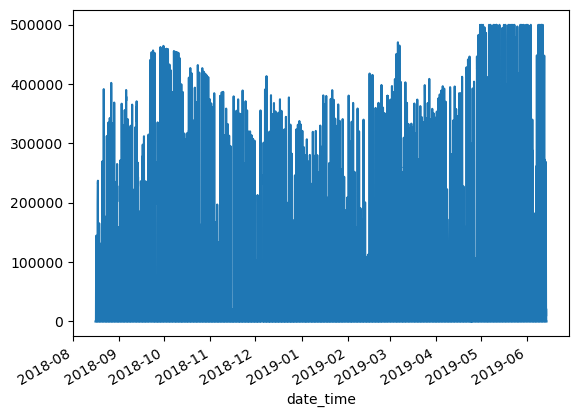

In [115]:
all_ac.plot()

date_time
2018-08-16 00:00:00+08:00   -150.0
2018-08-16 00:15:00+08:00   -150.0
2018-08-16 00:30:00+08:00   -150.0
2018-08-16 00:45:00+08:00   -150.0
2018-08-16 01:00:00+08:00   -150.0
                             ...  
2018-08-20 02:45:00+08:00   -150.0
2018-08-20 03:00:00+08:00   -150.0
2018-08-20 03:15:00+08:00   -150.0
2018-08-20 03:30:00+08:00   -150.0
2018-08-20 03:45:00+08:00   -150.0
Length: 400, dtype: float64